In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [ ]:
#Read in dataset
data=pd.read_csv("/content/drive/MyDrive/BI/Year 2/Fall/APS490/injury_analysis_construction.csv")

In [ ]:
#Copy data
same_data = data.copy()

In [ ]:
#View the first 5 rows of the dataset
data.head()

,claim_type_description,accident_date,fatality_indicator,claim_number,class_description,predominant_class,accident_time,injury_disease_category_description,claim_action_description,fatality_claim_description,firm_major_rate_group,firm_major_cu,full_time_worker_band,small_business_indicator,naics_description,industry_sector_code_description,sic_description,class_subclass,class_subclass_description,rate_group_code_description,cu_id_description,gender_code,accident_age,employment_date,occupational_experience_in_years,noc_occupation_category_description,noc_occupation_description,ccdo_occupation_category_description,ccdo_occupation_description,soc_occupation_category_description,soc_occupation_description,csa_accident_category_description,csa_accident_type_description,fatality_accident_type_description,accident_place_description,accident_place_municipal_name,csa_accident_source_category_description,csa_source_injury_description,csa_part_of_body_category_description,csa_part_of_body_description,stickman_1_description,stickman_2_description,stickman_3_description,csa_nature_of_injury_category_description,csa_nature_of_injury_description,accident_year,accident_month_number,accident_day_of_month_number,accident_month_name,ytd_accident_cost,critical_injury_indicator,ytd_number_of_days_lost
0,NO LOST TIME,5/10/2018,N,5331865,CONSTRUCTION,NaN,NaN,NOISE INDUCED HEARING LOSS,NaN,NOT APPLICABLE,217,3371270,20 TO 100,Y,NaN,CO - CONSTRUCTION,SHEET METAL AND OTHER DUCT WORK,NaN,NaN,707 - MECHANICAL AND SHEET METAL WORK,4244000 - SHEET METAL AND OTHER DUCT WORK,M,65.0,NaN,NaN,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,UNKNOWN OCCUPATION CODE,UNKNOWN OCCUPATION CODE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,RIGHT SIDE HEAD,INDUSTRIAL NOISE DEAFNESS,NaN,NOT APPLICABLE,NOT APPLICABLE,2018,10,5,October,4111.42,N,0.0
1,NO LOST TIME,6/11/2018,N,6105418,CONSTRUCTION,NaN,NaN,NOISE INDUCED HEARING LOSS,NaN,NOT APPLICABLE,437,2381900,GREATER THAN 100,Y,NaN,CO - CONSTRUCTION,FORM WORK,NaN,NaN,764 - HOMEBUILDING,4222002 - FORM WORK (LOW-RISE),M,38.0,NaN,NaN,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,"FARMING, HORTICULTURAL AND ANIMAL HUSBANDRY OC...",NURSERY AND RELATED WORKERS,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,GLANBROOK,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,INDUSTRIAL NOISE DEAFNESS,NaN,NaN,NOT APPLICABLE,NOT APPLICABLE,2018,11,6,November,15603.76,N,0.0
2,NO LOST TIME,24/1/2018,N,6211296,CONSTRUCTION,NaN,NaN,NOISE INDUCED HEARING LOSS,NaN,NOT APPLICABLE,465,2382200,GREATER THAN 100,Y,NaN,CO - CONSTRUCTION,MILLWRIGHT AND RIGGING,NaN,NaN,737 - MILLWRIGHTING AND WELDING,4255000 - MILLWRIGHT AND RIGGING WORK,M,72.0,NaN,NaN,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,UNKNOWN OCCUPATION CODE,UNKNOWN OCCUPATION CODE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,INDUSTRIAL NOISE DEAFNESS,NaN,NaN,NOT APPLICABLE,NOT APPLICABLE,2018,1,24,January,2720.40,N,0.0
3,NO LOST TIME,24/12/2019,N,8593956,CONSTRUCTION,NaN,NaN,NOISE INDUCED HEARING LOSS,NaN,NOT APPLICABLE,217,3323290,LESS THAN 20,Y,NaN,CO - CONSTRUCTION,SIDING WORK,NaN,NaN,751 - SIDING AND OUTSIDE FINISHING,4232000 - SIDING WORK,M,72.0,NaN,NaN,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,"PRODUCT FABRICATING, ASSEMBLING AND REPAIRING ...",CABINET & WOOD FURNITURE MAKER,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,HAMILTON,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,INDUSTRIAL NOISE DEAFNESS,NaN,NaN,NOT APPLICABLE,NOT APPLICABLE,2019,12,24,December,5993.31,N,0.0
4,NO LOST TIME,23/5/2017,N,9282517,CONSTRUCTION,NaN,NaN,NOISE INDUCED HEARING LOSS,NaN,NOT APPLICABLE,465,2382100,GREATER THAN 100,Y,NaN,CO - CONSTRUCTION,ELECTRICAL WORK,NaN,NaN,704 - ELECTRICAL AND INCIDENTAL CONSTRUCTION S...,42610

In [ ]:
#Drop columns that will not affect the model
data = data.drop(['accident_date', 'claim_number', 'class_description', 'industry_sector_code_description',
                                'rate_group_code_description', 'cu_id_description', 'noc_occupation_category_description', 
                                'ccdo_occupation_category_description', 'soc_occupation_category_description', 'csa_accident_category_description',
                                'csa_part_of_body_category_description', 'csa_nature_of_injury_category_description', 'accident_month_name'], axis = 1)

#Drop columns that contain more than 60% of null values and will not affect the model
data = data.drop(['predominant_class', 'accident_time', 'claim_action_description', 'class_subclass_description',
                                'employment_date', 'stickman_2_description', 'stickman_3_description'], axis = 1)

#Correct data type
#Convert accident_year column to object
data['accident_year'] = data['accident_year'].apply(str)

#Convert accident_month_number column to object
data['accident_month_number'] = data['accident_month_number'].apply(str)

#Convert accident_day_of_month_number column to object
data['accident_day_of_month_number'] = data['accident_day_of_month_number'].apply(str)

#Convert firm_major_rate_group column to object
data['firm_major_rate_group'] = data['firm_major_rate_group'].apply(str)

#Convert firm_major_cu column to object
data['firm_major_cu'] = data['firm_major_cu'].apply(str)

#Drop columns that contain more than 90% of 'NOT APPLICABLE' values
data = data.drop(['injury_disease_category_description', 'fatality_claim_description', 'soc_occupation_description',
                                'fatality_accident_type_description'], axis=1)

#Drop rows that contain 'NOT APPLICABLE' values
data = data[(data.ccdo_occupation_description != 'NOT APPLICABLE') &
                          (data.noc_occupation_description != 'NOT APPLICABLE') &
                          (data.csa_accident_type_description != 'NOT APPLICABLE') &
                          (data.accident_place_description != 'NOT APPLICABLE') &
                          (data.accident_place_municipal_name != 'NOT APPLICABLE') &
                          (data.csa_accident_source_category_description != 'NOT APPLICABLE') &
                          (data.csa_source_injury_description != 'NOT APPLICABLE') &
                          (data.csa_part_of_body_description != 'NOT APPLICABLE') &
                          (data.csa_nature_of_injury_description != 'NOT APPLICABLE')]

#Impute missing values with mode
data['naics_description'] = data['naics_description'].fillna(data['naics_description'].mode()[0])
data['sic_description'] = data['sic_description'].fillna(data['sic_description'].mode()[0])
data['class_subclass'] = data['class_subclass'].fillna(data['class_subclass'].mode()[0])

#Impute missing values with median
accident_age_median = data['accident_age'].median()
data['accident_age'].fillna(value = accident_age_median, inplace=True)

critical_injury_indicator_median = data['occupational_experience_in_years'].median()
data['occupational_experience_in_years'].fillna(value = critical_injury_indicator_median, inplace=True)

In [ ]:
# Creating dummy variables for the categorical columns
#drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [ ]:
#Separate independent variables from dependent variable
x = data.drop('ytd_accident_cost', axis = 1)
y = data['ytd_accident_cost']

In [ ]:
#Split the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
#Check the shape of the train and test datasets
print("Shape of the train dataset: ", x_train.shape)
print("Shape of the test dataset: ", x_test.shape)

Shape of the train dataset:  (34211, 3581)
Shape of the test dataset:  (8553, 3581)


In [ ]:
#Create functions to compute metrics for model evaluation
#Adjust R-squared
def adj_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#MAPE
def mape_score(targets, predictions):
  return np.mean(np.abs(targets - predictions) / targets) * 100

#Different metrics for the model
def model_performance_regression(model, predictors, target):
  pred = model.predict(predictors)

  r2 = r2_score(target, pred) #R-squared
  adjr2 = adj_r2_score(predictors, target, pred) #Adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred)) #RMSE
  mae = mean_absolute_error(target, pred) #MAE
  mape = mape_score(target, pred) #MAPE

  #Create dataframe of metrics
  df_perf = pd.DataFrame(
      {
          "RMSE": rmse,
          "MAE": mae,
          "R-squared": r2,
          "Adj. R-squared": adjr2,
          "MAPE": mape,
      },
      index = [0],
  )

  return df_perf

In [ ]:
#RMSE
def rmse(predictions, targets):
  return np.sqrt(((targets - predictions) ** 2).mean())

#MAPE
def mape(predictions, targets):
  return np.mean(np.abs((targets - predictions)) / targets) * 100

#MAE
def mae(predictions, targets):
  return np.mean(np.abs((targets - predictions)))

#Model performance on test and train datasets
def model_perf(olsmodel, x_train, x_test, y_train, y_test):
  y_pred_train = olsmodel.predict(x_train)
  y_observed_train = y_train
  y_pred_test = olsmodel.predict(x_test)
  y_observed_test = y_test

  print(
      pd.DataFrame(
          {
              "Data": ["Train", "Test"],
              "RMSE": [
                  rmse(y_pred_train, y_observed_train),
                  rmse(y_pred_test, y_observed_test)
              ],
              "MAE": [
                  mae(y_pred_train, y_observed_train),
                  mae(y_pred_test, y_observed_test)
              ],
              "MAPE": [
                  mape(y_pred_train, y_observed_train),
                  mape(y_pred_test, y_observed_test)
              ],
          }
      )
  )

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

#Fitting the model
regressor.fit(x_train, y_train)

#Model performance
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)

regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,57973.360725,10802.31581,0.58849,0.292047,inf


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_tuned = RandomForestRegressor(random_state=1)

#Grid of parameters to choose from
parameters = {"n_estimators": [1000, 2000, 3000, 4000, 5000], 
              "max_depth": [None, 1, 2, 3, 4],
              "max_features": [3581],
              "min_samples_split": [2, 4, 6, 8, 10],
              "min_samples_leaf": [2, 4, 6, 8, 10]
              }

#Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

#Run the grid search 
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

#Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

In [ ]:
# Model Performance on test data i.e prediction
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.722809,1.156349,0.952868,0.952848,9.640594


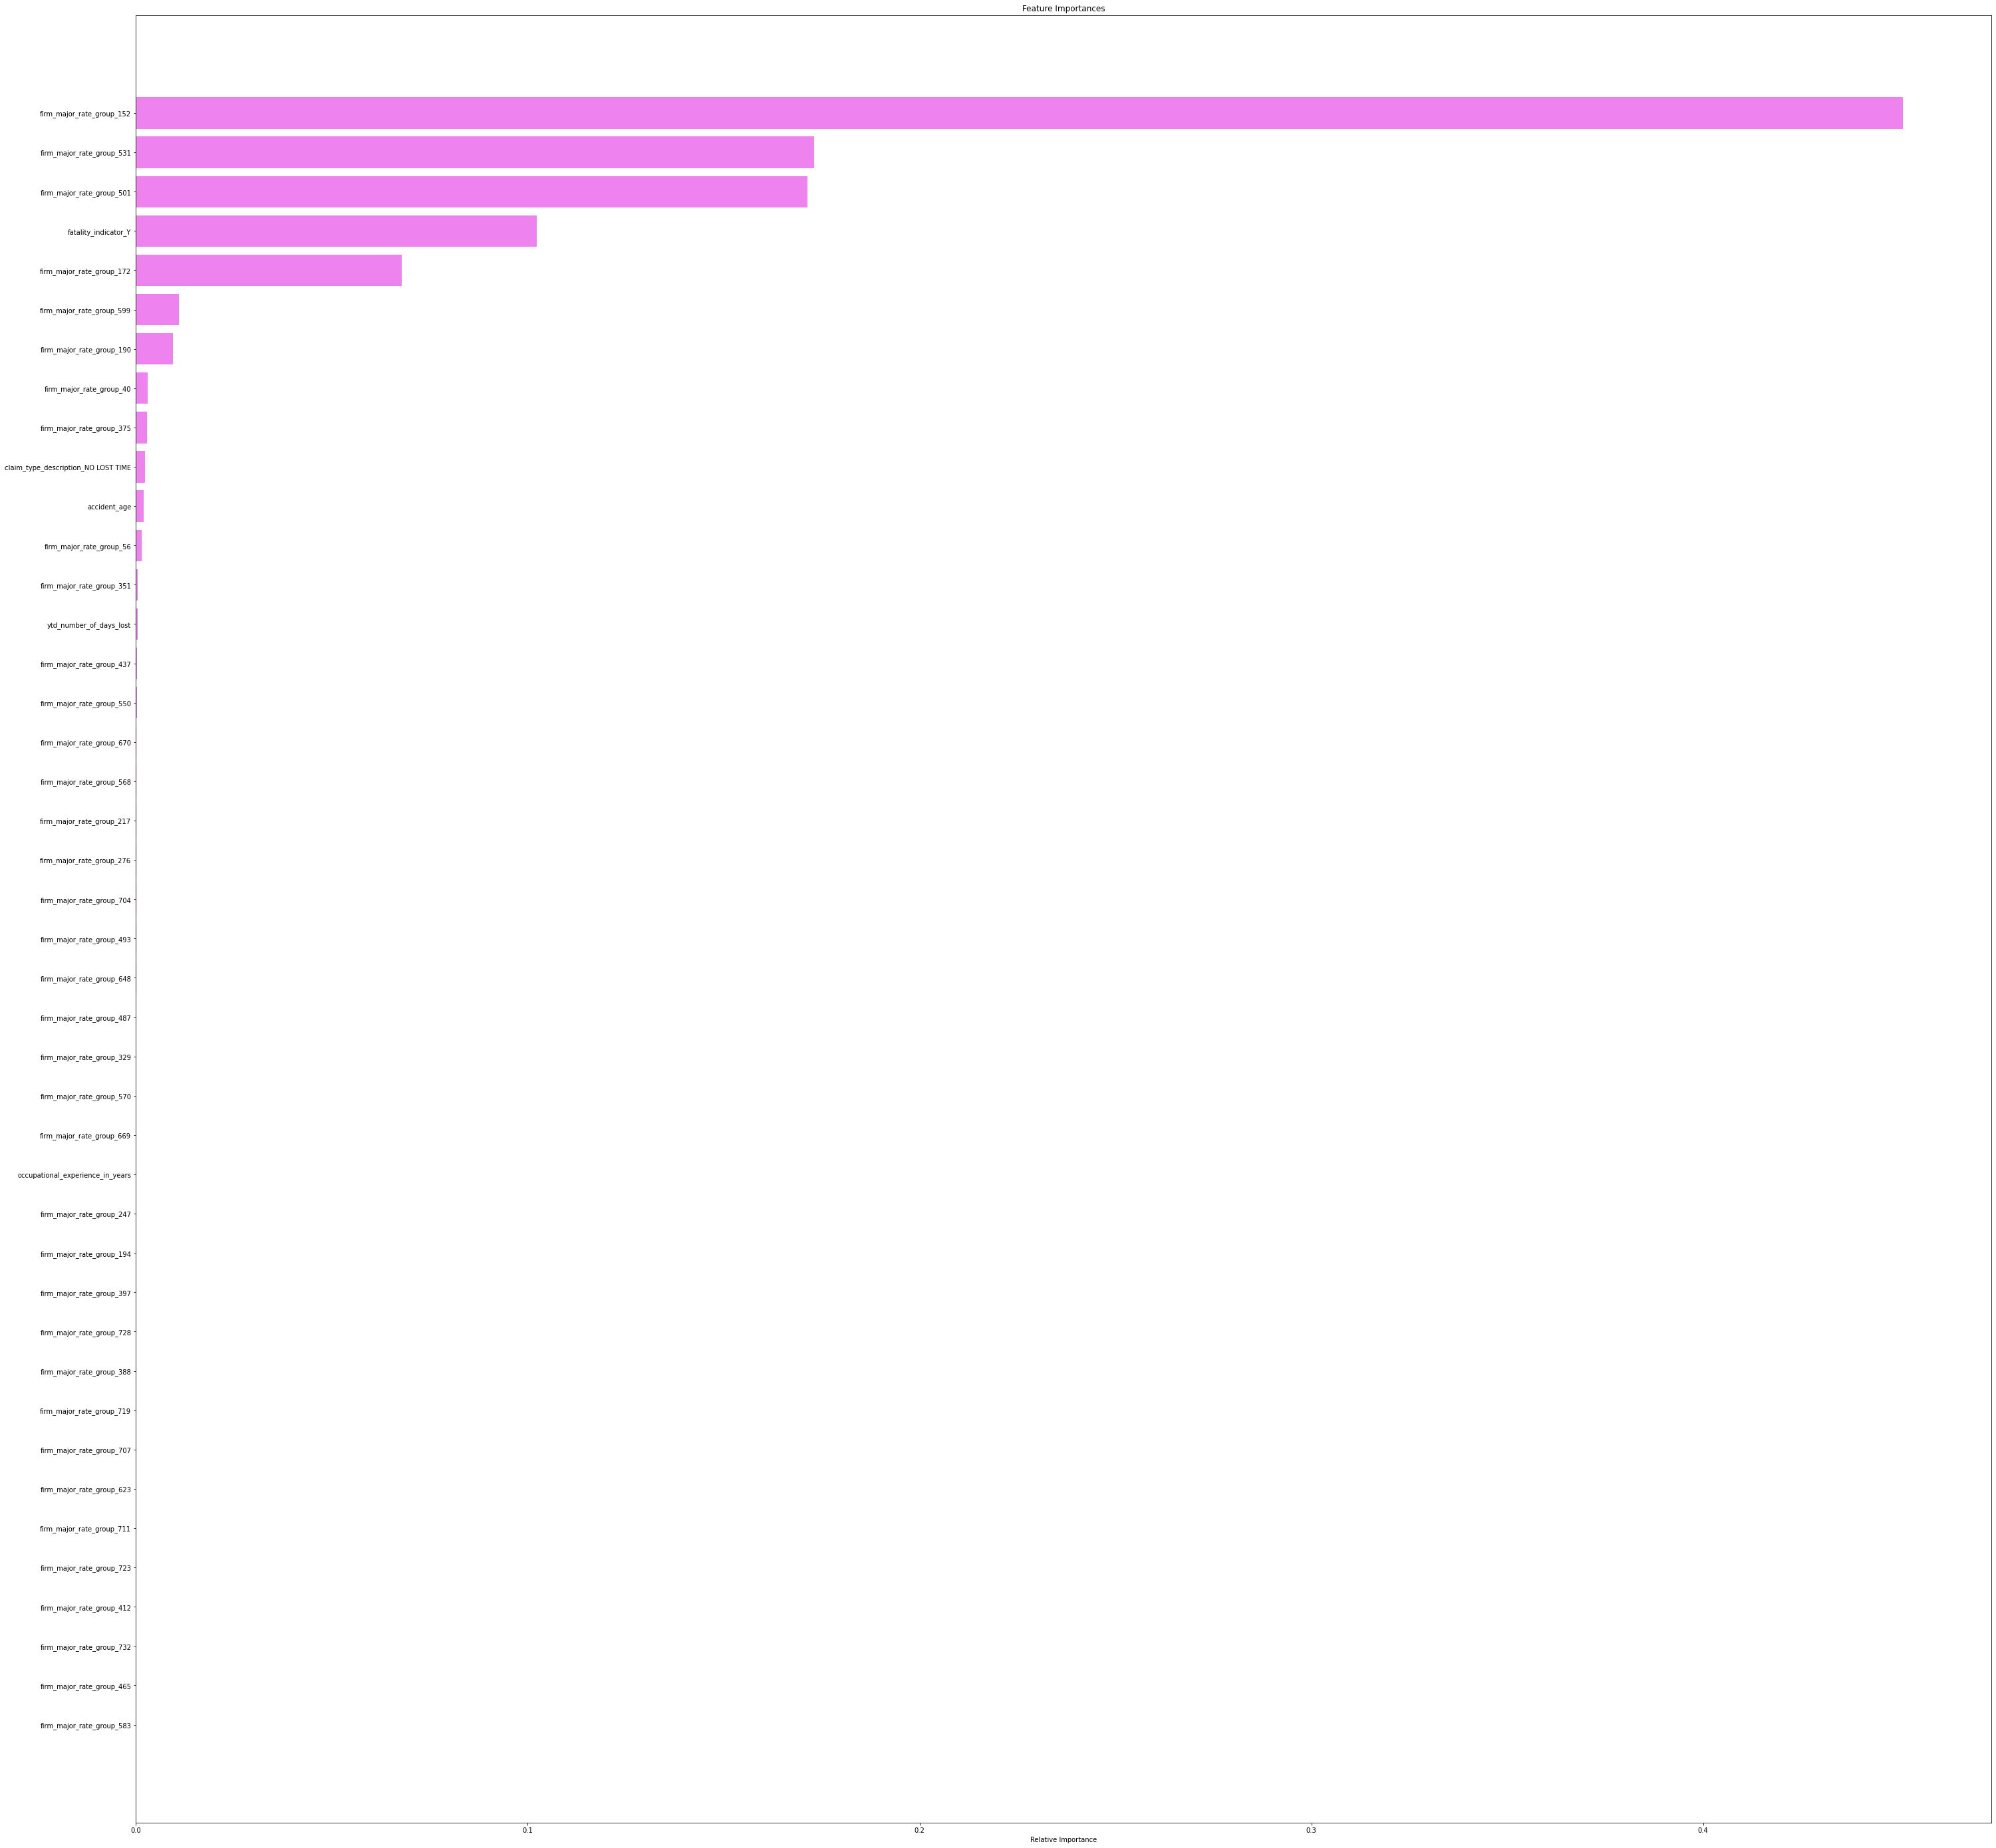

In [ ]:
from numpy.core.numeric import indices
#Plot the feature importance
features = list(x.columns)
importances = rf_tuned_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(50,50))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()